In [1]:
import pandas as pd
import math
import keras
from keras.layers import Dense,Embedding, Flatten, Conv1D, GlobalMaxPooling1D, LSTM, Bidirectional
from keras.preprocessing.text import text_to_word_sequence,Tokenizer
from keras.preprocessing.sequence import pad_sequences

C:\Users\David\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_pickle("./cryptic_dataset/combined_fifteen_times_final_filtered.pickle").drop_duplicates()

In [3]:
df_index = 4
print(df.iloc[df_index]['clue'])
print(df.iloc[df_index]['exp'])
print(df.iloc[df_index])

A priest, old chap moved when digesting extremes of religiosity in unorthodox books 
 APOCRYPHA : A + P(abbrev. for “priest”) + O(abbrev. for “old”) + { anagram of(moved) CHAP containing(when digesting) outermost letters of(extremes of) “religiousity” }. Answer: The books that are not accepted by certain faiths as being part of the Bible. 
clue             A priest, old chap moved when digesting extrem...
exp               APOCRYPHA : A + P(abbrev. for “priest”) + O(a...
is_anagram                                                    True
is_homophone                                                 False
is_double                                                    False
is_cryptic                                                   False
is_contain                                                    True
is_reverse                                                   False
is_alternate                                                 False
is_init                                                

In [4]:
cc_types = "is_anagram	is_homophone	is_double	is_cryptic	is_contain	is_reverse	is_alternate	is_init	is_delete	is_charade	is_&lit	is_hidden	is_spoonerism	is_palindrome".split('	')

In [5]:
# df.clue = df.clue.apply(text_to_word_sequence)

In [6]:
cc_types_dfs = [df[df[cc_type]==True] for cc_type in cc_types]

In [7]:
for cc_type,cc_type_df in zip(cc_types,cc_types_dfs):
    cc_type_df['category'] = cc_type

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
samples = [df.sample(50) for df in cc_types_dfs]

In [9]:
# pd.concat(samples).to_csv("cryptic_clues_size50_samples.csv")

In [10]:
pd.concat(samples)

,clue,exp,is_anagram,is_homophone,is_double,is_cryptic,is_contain,is_reverse,is_alternate,is_init,is_delete,is_charade,is_&lit,is_hidden,is_spoonerism,is_palindrome,category
75852,"big enticement, blowing up Cameron's lot all i...",(A BIG ENTICEMENT)* AInd: Blowing up,True,False,False,False,False,False,False,False,False,False,False,False,False,False,is_anagram
40704,Part of German history is involved with armie...,K (king) + an anagram of (involved with) ARM...,True,False,False,False,False,False,False,False,False,True,False,False,False,False,is_anagram
24787,Ratty succeeded Mr Toad in celebrity status,STARDOM / TSARDOM Succeeded+MR+TOAD (anag: ra...,True,False,False,False,False,False,False,False,False,True,False,False,False,False,is_anagram
52524,"Able to grab penis, leer – he is shocked",PREHENSILE E An anagram of PENIS LEER H[E] –...,True,False,False,False,False,False,False,False,True,False,False,False,False,False,is_anagram
76188,Potentially make it a target,anagram (potentially) of MAKE IT A,True,False,False,False,False,False,False,False,False,False,False,False,False,False,is_anagram
42201,"Difficult to believe credit will be cut, or ha...",INcrEDIBLE (difficult to believe) missing CR ...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,is_anagram
24746,Actually it's really cool – starts working in ...,Two lots of wordplay: A{ctually} i{t’s} r{eal...,True,False,False,False,False,False,False,False,False,False,True,False,False,False,is_anagram
27395,St Michael viewed differently after the play,THE ALCHEMIST (ST MICHAEL*) after THE,True,False,False,False,False,False,False,False,False,False,False,False,False,False,is_anagram
24696,Breaks resulted in disruption,An anagram (‘disruption’) of ‘resulted in’.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,is_anagram
28418,Tonic water possibly keeps you warm over Chris...,WINTER COAT : Anagram of(possibly) TONIC WATER.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,is_anagram


In [11]:
# !open .

In [12]:
def get_input_val_test(df):
    length = len(df)
    input_len = math.floor(length*0.7)
    val_len  = math.floor(length*0.2)
    test_len = math.floor(length*0.1)
    input_df = df[:input_len]
    val_df = df[input_len:input_len+val_len]
    test_df = df[input_len+val_len:]
    return input_df,val_df,test_df

In [13]:
input_cc_types_df = pd.concat([get_input_val_test(df)[0] for df in cc_types_dfs])
val_cc_types_df = pd.concat([get_input_val_test(df)[1] for df in cc_types_dfs])
test_cc_types_df = pd.concat([get_input_val_test(df)[2] for df in cc_types_dfs])

In [14]:
test_cc_types_df

,clue,exp,is_anagram,is_homophone,is_double,is_cryptic,is_contain,is_reverse,is_alternate,is_init,is_delete,is_charade,is_&lit,is_hidden,is_spoonerism,is_palindrome,category
89001,Fast-growing conifers ideally spread round end...,*(ideally) “around” (garde)N + I (“one”) 12 ...,True,False,False,False,False,False,False,False,False,True,False,False,False,False,is_anagram
89004,Altar? I'm nervous of marriage,*(altar im),True,False,False,False,False,False,False,False,False,False,False,False,False,False,is_anagram
89014,What burglars use as the last resort,(THE LAST)* [* = resort],True,False,False,False,False,False,False,False,False,False,False,False,False,False,is_anagram
89021,Shed a pound at one work-out,L (a pound) + (AT ONE)* [* = work-out],True,False,False,False,False,False,False,False,False,True,False,False,False,False,is_anagram
89029,race he organised would keep you awake,(A RACE HE)* [* = organised] There’s actually...,True,False,False,False,False,False,False,False,False,True,False,False,False,False,is_anagram
89030,“All together” possibly means the Home Counties,"(MEANS)* + SE (Home Counties, the South East)...",True,False,False,False,False,False,False,False,False,True,False,False,False,False,is_anagram
89034,Beautiful virgin of myth also roamed freely,AND (also) + (ROAMED)* [* = freely],True,False,False,False,False,False,False,False,False,True,False,False,False,False,is_anagram
89038,Medicine prepared without one for such diseases,(MEDICINE minus I (one))* [* = prepared],True,False,False,False,False,False,False,False,True,False,False,False,False,False,is_anagram
89045,"Drink knocked back, around time chap crashes?",GIN (drink) backwards + T (time) in anagram o...,True,False,False,False,False,False,False,False,False,True,False,False,False,False,is_anagram
89046,"Without limits, José Cura could be a legendary...",Anagram (could be) of [j]OS[e] CURA,True,False,False,False,False,False,False,False,True,False,False,False,False,False,is_anagram


In [15]:
max_size = input_cc_types_df.groupby('category').count().max()[0]

In [16]:
input_cc_types_df.groupby('category').count()

,clue,exp,is_anagram,is_homophone,is_double,is_cryptic,is_contain,is_reverse,is_alternate,is_init,is_delete,is_charade,is_&lit,is_hidden,is_spoonerism,is_palindrome
category,,,,,,,,,,,,,,,,
is_&lit,511,511,511,511,511,511,511,511,511,511,511,511,511,511,511,511
is_alternate,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513
is_anagram,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961
is_charade,19784,19784,19784,19784,19784,19784,19784,19784,19784,19784,19784,19784,19784,19784,19784,19784
is_contain,8966,8966,8966,8966,8966,8966,8966,8966,8966,8966,8966,8966,8966,8966,8966,8966
is_cryptic,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042
is_delete,14711,14711,14711,14711,14711,14711,14711,14711,14711,14711,14711,14711,14711,14711,14711,14711
is_double,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403
is_hidden,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117,2117


In [17]:
lst = [input_cc_types_df]
for class_index, group in input_cc_types_df.groupby('category'):
    sample = group.sample(max_size-len(group), replace=True, )
    lst.append(sample)
upsampled_input_cc_types_df = pd.concat(lst)

In [18]:
cc_input_df = upsampled_input_cc_types_df.drop('category',axis=1)
cc_val_df = val_cc_types_df.drop('category',axis=1).drop_duplicates()
cc_test_df = test_cc_types_df.drop('category',axis=1).drop_duplicates()

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.clue.tolist())
cc_input_data = pad_sequences(tokenizer.texts_to_sequences(cc_input_df.clue.tolist()),maxlen=15)
cc_val_data = pad_sequences(tokenizer.texts_to_sequences(cc_val_df.clue.tolist()),maxlen=15)
cc_test_data = pad_sequences(tokenizer.texts_to_sequences(cc_test_df.clue.tolist()),maxlen=15)

In [20]:
cc_input_df.clue.tolist()

['Stubbornness ruined body defending posh group of drivers ',
 'A priest, old chap moved when digesting extremes of religiosity in unorthodox books ',
 'Dubious name associated with individual plant ',
 'Opportunist always following Cuban revolutionary around college ',
 'Stay hiker disrupted with no end of drink in a frenzied state ',
 'Awkward to-do amid bow, say, in part of church ',
 'Preserve trailed by celebrated baseball player in capital ',
 "Candour unwisely shown about large witches' pot ",
 "Children's author had dollar exchanged ",
 'Dagger found in street by messy toilet ',
 'Language used when armchair almost collapsed ',
 'Get near volatile chemical substance ',
 'Article put in last, possibly at an angle ',
 'Pickled sot, half unwell, found nirvana in drink barrel ',
 'Colour and curious tint mixed by small urchin ',
 "It's a tragedy how foul Macbeth butchered new duke ",
 'Perhaps pink eggs with red tea? Romantic supper ',
 'Vera and I dance like this for a hunk ',
 'T

In [21]:
cc_input_data_out = cc_input_df[cc_input_df.columns[2:]] * 1
cc_val_data_out = cc_val_df[cc_val_df.columns[2:]] * 1
cc_test_data_out = cc_test_df[cc_test_df.columns[2:]] * 1

In [22]:
vocab_size = len(tokenizer.word_index) + 1

In [23]:
model = keras.Sequential()
# model.add(Embedding(vocab_size, 300))
model.add(Dense(14, activation='relu', input_dim=15))
model.add(Dense(14, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

In [24]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=128, epochs=6)

Train on 276976 samples, validate on 14102 samples
Epoch 1/6
276976/276976 [==============================] - 10s 35us/step - loss: 2.7584 - categorical_accuracy: 0.1717 - val_loss: 1.7265 - val_categorical_accuracy: 0.2576
Epoch 2/6
276976/276976 [==============================] - 7s 27us/step - loss: 1.9764 - categorical_accuracy: 0.1880 - val_loss: 1.7085 - val_categorical_accuracy: 0.2619
Epoch 3/6
276976/276976 [==============================] - 7s 25us/step - loss: 1.9690 - categorical_accuracy: 0.1860 - val_loss: 1.7052 - val_categorical_accuracy: 0.2526
Epoch 4/6
276976/276976 [==============================] - 8s 28us/step - loss: 1.9658 - categorical_accuracy: 0.1860 - val_loss: 1.7032 - val_categorical_accuracy: 0.2552
Epoch 5/6
276976/276976 [==============================] - 7s 26us/step - loss: 1.9652 - categorical_accuracy: 0.1868 - val_loss: 1.7046 - val_categorical_accuracy: 0.2527
Epoch 6/6
276976/276976 [==============================] - 7s 26us/step - loss: 1.9643 -

In [58]:
model.evaluate(x=cc_test_data, y=cc_test_data_out, batch_size=None, verbose=1, sample_weight=None, steps=None)

7961/7961 [==============================] - 0s 14us/step


[1.8774394556559924, 0.24695390026378597]

In [62]:
model = keras.Sequential()
model.add(Embedding(vocab_size, 300,input_length=15))
model.add(Dense(300, activation='relu', input_dim=15))
model.add(Dense(14, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [60]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=128, epochs=4)

Train on 358484 samples, validate on 15859 samples
Epoch 1/4
358484/358484 [==============================] - 5s 15us/step - loss: 2.2927 - categorical_accuracy: 0.1763 - val_loss: 1.8880 - val_categorical_accuracy: 0.2399
Epoch 2/4
358484/358484 [==============================] - 5s 14us/step - loss: 2.2690 - categorical_accuracy: 0.1828 - val_loss: 1.8880 - val_categorical_accuracy: 0.2403
Epoch 3/4
358484/358484 [==============================] - 5s 13us/step - loss: 2.2717 - categorical_accuracy: 0.1815 - val_loss: 1.8893 - val_categorical_accuracy: 0.2406
Epoch 4/4
358484/358484 [==============================] - 5s 13us/step - loss: 2.2704 - categorical_accuracy: 0.1821 - val_loss: 1.8871 - val_categorical_accuracy: 0.2438


In [61]:
model.evaluate(x=cc_test_data, y=cc_test_data_out, batch_size=None, verbose=1, sample_weight=None, steps=None)

7961/7961 [==============================] - 0s 13us/step


[1.870498187741717, 0.24180379349327974]

In [25]:
model = keras.Sequential()
# model.add(Embedding(vocab_size, 300,input_length=15))
model.add(Dense(300, activation='sigmoid', input_dim=15))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(14, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [26]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=128, epochs=4)

Train on 276976 samples, validate on 14102 samples
Epoch 1/4
276976/276976 [==============================] - 10s 37us/step - loss: 0.3399 - categorical_accuracy: 0.0950 - val_loss: 0.2841 - val_categorical_accuracy: 0.1603
Epoch 2/4
276976/276976 [==============================] - 10s 36us/step - loss: 0.3267 - categorical_accuracy: 0.1277 - val_loss: 0.2833 - val_categorical_accuracy: 0.1626
Epoch 3/4
276976/276976 [==============================] - 10s 37us/step - loss: 0.3197 - categorical_accuracy: 0.1454 - val_loss: 0.2832 - val_categorical_accuracy: 0.1658
Epoch 4/4
276976/276976 [==============================] - 11s 40us/step - loss: 0.3141 - categorical_accuracy: 0.1540 - val_loss: 0.2858 - val_categorical_accuracy: 0.1640


In [31]:
model = keras.Sequential()
# model.add(Embedding(vocab_size, 300,input_length=15))
model.add(Dense(300, activation='sigmoid', input_dim=15))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(14, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [32]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=128, epochs=4)

Train on 276976 samples, validate on 14102 samples
Epoch 1/4
276976/276976 [==============================] - 10s 37us/step - loss: 0.3395 - categorical_accuracy: 0.0960 - val_loss: 0.2896 - val_categorical_accuracy: 0.1449
Epoch 2/4
276976/276976 [==============================] - 10s 35us/step - loss: 0.3257 - categorical_accuracy: 0.1319 - val_loss: 0.2839 - val_categorical_accuracy: 0.1700
Epoch 3/4
236288/276976 [========================>.....] - ETA: 1s - loss: 0.3208 - categorical_accuracy: 0.1440

KeyboardInterrupt: 

In [37]:
model = keras.Sequential()
model.add(Embedding(vocab_size, 300,input_length=15))
model.add(Flatten())
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(14, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [39]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=32, epochs=4)

Train on 276976 samples, validate on 14102 samples
Epoch 1/4
276976/276976 [==============================] - 162s 586us/step - loss: 0.0028 - categorical_accuracy: 0.7195 - val_loss: 0.7368 - val_categorical_accuracy: 0.3614
Epoch 2/4
276976/276976 [==============================] - 162s 584us/step - loss: 0.0018 - categorical_accuracy: 0.7105 - val_loss: 0.8168 - val_categorical_accuracy: 0.3375
Epoch 3/4
276976/276976 [==============================] - 162s 586us/step - loss: 0.0012 - categorical_accuracy: 0.7084 - val_loss: 0.8856 - val_categorical_accuracy: 0.3435
Epoch 4/4
276976/276976 [==============================] - 163s 588us/step - loss: 8.1092e-04 - categorical_accuracy: 0.7045 - val_loss: 0.9150 - val_categorical_accuracy: 0.3392


In [471]:
model = keras.Sequential()
model.add(Embedding(vocab_size, 10,input_length=15))
model.add(Conv1D(filters=15,kernel_size=2))
model.add(GlobalMaxPooling1D())
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(14, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [472]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=256, epochs=4)

Train on 480706 samples, validate on 16926 samples
Epoch 1/4
480706/480706 [==============================] - 13s 28us/step - loss: 0.3132 - categorical_accuracy: 0.3622 - val_loss: 0.2806 - val_categorical_accuracy: 0.3209
Epoch 2/4
480706/480706 [==============================] - 12s 25us/step - loss: 0.1933 - categorical_accuracy: 0.4961 - val_loss: 0.3093 - val_categorical_accuracy: 0.3052
Epoch 3/4
480706/480706 [==============================] - 12s 24us/step - loss: 0.1522 - categorical_accuracy: 0.5294 - val_loss: 0.3411 - val_categorical_accuracy: 0.3040
Epoch 4/4
480706/480706 [==============================] - 12s 24us/step - loss: 0.1292 - categorical_accuracy: 0.5360 - val_loss: 0.3725 - val_categorical_accuracy: 0.2919


In [478]:
model = keras.Sequential()
model.add(Embedding(vocab_size, 10,input_length=15))
model.add(LSTM(units=15))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(14, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [479]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=512, epochs=10)

Train on 480706 samples, validate on 16926 samples
Epoch 1/10
480706/480706 [==============================] - 22s 45us/step - loss: 0.3965 - categorical_accuracy: 0.2432 - val_loss: 0.3013 - val_categorical_accuracy: 0.3406
Epoch 2/10
480706/480706 [==============================] - 20s 41us/step - loss: 0.3287 - categorical_accuracy: 0.3195 - val_loss: 0.2875 - val_categorical_accuracy: 0.3196
Epoch 3/10
480706/480706 [==============================] - 20s 42us/step - loss: 0.2611 - categorical_accuracy: 0.4215 - val_loss: 0.2971 - val_categorical_accuracy: 0.3073
Epoch 4/10
480706/480706 [==============================] - 20s 42us/step - loss: 0.2048 - categorical_accuracy: 0.5103 - val_loss: 0.3144 - val_categorical_accuracy: 0.3185
Epoch 5/10
480706/480706 [==============================] - 20s 41us/step - loss: 0.1678 - categorical_accuracy: 0.5882 - val_loss: 0.3387 - val_categorical_accuracy: 0.3311
Epoch 6/10
480706/480706 [==============================] - 20s 42us/step - los

In [70]:
model = keras.Sequential()
model.add(Embedding(vocab_size, 10,input_length=15))
model.add(LSTM(units=15,dropout=0.5))
# model.add(Dense(30, activation='sigmoid'))
model.add(Dense(14, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [71]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=512, epochs=10)

Train on 358484 samples, validate on 15859 samples
Epoch 1/10
358484/358484 [==============================] - 17s 48us/step - loss: 0.3952 - categorical_accuracy: 0.2279 - val_loss: 0.2860 - val_categorical_accuracy: 0.3814
Epoch 2/10
358484/358484 [==============================] - 16s 44us/step - loss: 0.3145 - categorical_accuracy: 0.3416 - val_loss: 0.2739 - val_categorical_accuracy: 0.3641
Epoch 3/10
358484/358484 [==============================] - 16s 45us/step - loss: 0.2660 - categorical_accuracy: 0.4149 - val_loss: 0.2724 - val_categorical_accuracy: 0.3771
Epoch 4/10
358484/358484 [==============================] - 16s 44us/step - loss: 0.2338 - categorical_accuracy: 0.4856 - val_loss: 0.2725 - val_categorical_accuracy: 0.3940
Epoch 5/10
358484/358484 [==============================] - 16s 44us/step - loss: 0.2086 - categorical_accuracy: 0.5290 - val_loss: 0.2734 - val_categorical_accuracy: 0.3673
Epoch 6/10
358484/358484 [==============================] - 16s 44us/step - los

KeyboardInterrupt: 

In [483]:
model = keras.Sequential()
model.add(Embedding(vocab_size, 10,input_length=15))
model.add(LSTM(units=15,dropout=0.5))
model.add(Dense(14, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['categorical_accuracy'])

In [484]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=512, epochs=10)

Train on 480706 samples, validate on 16926 samples
Epoch 1/10
480706/480706 [==============================] - 24s 50us/step - loss: 0.3729 - categorical_accuracy: 0.2750 - val_loss: 0.2868 - val_categorical_accuracy: 0.3534
Epoch 2/10
480706/480706 [==============================] - 22s 46us/step - loss: 0.2979 - categorical_accuracy: 0.3678 - val_loss: 0.2798 - val_categorical_accuracy: 0.3122
Epoch 3/10
480706/480706 [==============================] - 22s 45us/step - loss: 0.2621 - categorical_accuracy: 0.3925 - val_loss: 0.2765 - val_categorical_accuracy: 0.2912
Epoch 4/10
480706/480706 [==============================] - 22s 46us/step - loss: 0.2378 - categorical_accuracy: 0.3910 - val_loss: 0.2806 - val_categorical_accuracy: 0.2862
Epoch 5/10
480706/480706 [==============================] - 22s 46us/step - loss: 0.2195 - categorical_accuracy: 0.3993 - val_loss: 0.2868 - val_categorical_accuracy: 0.2821
Epoch 6/10
480706/480706 [==============================] - 21s 45us/step - los

In [485]:
model = keras.Sequential()
model.add(Embedding(vocab_size, 10,input_length=15))
model.add(LSTM(units=100,dropout=0.5))
model.add(Dense(14, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['categorical_accuracy'])

In [486]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=512, epochs=4)

Train on 480706 samples, validate on 16926 samples
Epoch 1/4
480706/480706 [==============================] - 63s 130us/step - loss: 0.3368 - categorical_accuracy: 0.3093 - val_loss: 0.2784 - val_categorical_accuracy: 0.3377
Epoch 2/4
480706/480706 [==============================] - 60s 125us/step - loss: 0.2544 - categorical_accuracy: 0.3886 - val_loss: 0.2754 - val_categorical_accuracy: 0.3392
Epoch 3/4
480706/480706 [==============================] - 59s 124us/step - loss: 0.2061 - categorical_accuracy: 0.4286 - val_loss: 0.2780 - val_categorical_accuracy: 0.3276
Epoch 4/4
480706/480706 [==============================] - 61s 127us/step - loss: 0.1781 - categorical_accuracy: 0.4674 - val_loss: 0.2845 - val_categorical_accuracy: 0.3838


In [487]:
model = keras.Sequential()
model.add(Embedding(vocab_size, 100,input_length=15))
model.add(LSTM(units=100,dropout=0.5))
model.add(Dense(14, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['categorical_accuracy'])

In [488]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=512, epochs=4)

Train on 480706 samples, validate on 16926 samples
Epoch 1/4
480706/480706 [==============================] - 131s 273us/step - loss: 0.2407 - categorical_accuracy: 0.4084 - val_loss: 0.2657 - val_categorical_accuracy: 0.3660
Epoch 2/4
480706/480706 [==============================] - 134s 278us/step - loss: 0.1200 - categorical_accuracy: 0.5198 - val_loss: 0.3120 - val_categorical_accuracy: 0.3779
Epoch 3/4
480706/480706 [==============================] - 129s 269us/step - loss: 0.0849 - categorical_accuracy: 0.5433 - val_loss: 0.3533 - val_categorical_accuracy: 0.3933
Epoch 4/4
480706/480706 [==============================] - 123s 256us/step - loss: 0.0670 - categorical_accuracy: 0.5531 - val_loss: 0.3648 - val_categorical_accuracy: 0.3614


In [493]:
len(model.get_weights()[1])

100

In [494]:
model = keras.Sequential()
model.add(Embedding(vocab_size, 100,input_length=15,mask_zero=True))
model.add(LSTM(units=100,dropout=0.5))
model.add(Dense(14, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['categorical_accuracy'])

In [495]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=512, epochs=4)

Train on 480706 samples, validate on 16926 samples
Epoch 1/4
480706/480706 [==============================] - 144s 299us/step - loss: 0.2603 - categorical_accuracy: 0.3927 - val_loss: 0.2619 - val_categorical_accuracy: 0.3735
Epoch 2/4
480706/480706 [==============================] - 144s 300us/step - loss: 0.1281 - categorical_accuracy: 0.5149 - val_loss: 0.2991 - val_categorical_accuracy: 0.3854
Epoch 3/4
480706/480706 [==============================] - 141s 293us/step - loss: 0.0891 - categorical_accuracy: 0.5421 - val_loss: 0.3305 - val_categorical_accuracy: 0.3654
Epoch 4/4
480706/480706 [==============================] - 142s 294us/step - loss: 0.0699 - categorical_accuracy: 0.5525 - val_loss: 0.3636 - val_categorical_accuracy: 0.3623


In [512]:
def top_3_accuracy(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=3)

model = keras.Sequential()
model.add(Embedding(vocab_size, 100,input_length=15,mask_zero=True))
model.add(LSTM(units=100,dropout=0.5))
model.add(Dense(14, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[top_3_accuracy])

In [513]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=512, epochs=4)

Train on 480706 samples, validate on 16926 samples
Epoch 1/4
480706/480706 [==============================] - 155s 323us/step - loss: 0.2645 - top_3_accuracy: 0.6709 - val_loss: 0.2829 - val_top_3_accuracy: 0.6989
Epoch 2/4
480706/480706 [==============================] - 151s 315us/step - loss: 0.0995 - top_3_accuracy: 0.9275 - val_loss: 0.3524 - val_top_3_accuracy: 0.7083
Epoch 3/4
480706/480706 [==============================] - 156s 324us/step - loss: 0.0604 - top_3_accuracy: 0.9550 - val_loss: 0.4098 - val_top_3_accuracy: 0.6998
Epoch 4/4
480706/480706 [==============================] - 151s 314us/step - loss: 0.0439 - top_3_accuracy: 0.9633 - val_loss: 0.4590 - val_top_3_accuracy: 0.7104


In [514]:
def top_3_accuracy(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=3)

model = keras.Sequential()
model.add(Embedding(vocab_size, 100,input_length=15,mask_zero=True))
model.add(LSTM(units=100,dropout=0.5))
model.add(Dense(14, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='RMSProp', metrics=[top_3_accuracy])

In [515]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=512, epochs=4)

Train on 480706 samples, validate on 16926 samples
Epoch 1/4
480706/480706 [==============================] - 144s 300us/step - loss: 0.2591 - top_3_accuracy: 0.6832 - val_loss: 0.2614 - val_top_3_accuracy: 0.7131
Epoch 2/4
480706/480706 [==============================] - 140s 292us/step - loss: 0.1269 - top_3_accuracy: 0.8907 - val_loss: 0.3014 - val_top_3_accuracy: 0.7368
Epoch 3/4
480706/480706 [==============================] - 139s 290us/step - loss: 0.0876 - top_3_accuracy: 0.9269 - val_loss: 0.3333 - val_top_3_accuracy: 0.7359
Epoch 4/4
480706/480706 [==============================] - 140s 292us/step - loss: 0.0685 - top_3_accuracy: 0.9408 - val_loss: 0.3611 - val_top_3_accuracy: 0.7363


In [517]:
model.evaluate(cc_test_data,cc_test_data_out)

8475/8475 [==============================] - 2s 203us/step


[0.3741736157664859, 0.7189380530903121]

In [38]:
def top_3_accuracy(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=3)

model = keras.Sequential()
model.add(Embedding(vocab_size, 100,input_length=15,mask_zero=True))
model.add(LSTM(units=100,dropout=0.5))
model.add(Dense(14, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='RMSProp', metrics=[top_3_accuracy,'accuracy','categorical_accuracy'])

In [39]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=512, epochs=4)

Train on 358484 samples, validate on 15859 samples
Epoch 1/4
137728/358484 [==========>...................] - ETA: 56s - loss: 0.3606 - top_3_accuracy: 0.4328 - acc: 0.8618 - categorical_accuracy: 0.2838

KeyboardInterrupt: 

In [54]:
def top_3_accuracy(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=3)

model = keras.Sequential()
model.add(Embedding(vocab_size, 300,input_length=15,mask_zero=True))
# model.add(Bidirectional(LSTM(units=100,dropout=0.5,return_sequences=True)))
model.add(Bidirectional(LSTM(units=1000,dropout=0.5)))
model.add(Dense(14, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='RMSProp', metrics=[top_3_accuracy,'accuracy','categorical_accuracy'])

In [55]:
filepath="2xBilstm-{epoch:02d}-{val_loss:.2f}-{val_categorical_accuracy:.2f}.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint]

In [56]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=128, epochs=4,callbacks=callbacks_list)

Train on 276976 samples, validate on 14102 samples
Epoch 1/4


KeyboardInterrupt: 

In [195]:
import pickle
with open('./trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [197]:
from matplotlib import pyplot

In [72]:
# Visualize training history
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: 'acc'

In [201]:
model.evaluate(x=cc_test_data, y=cc_test_data_out, batch_size=None, verbose=1, sample_weight=None, steps=None)

8475/8475 [==============================] - 10s 1ms/step


[0.4468569082215121,
 0.6974631269069548,
 0.8684028533426358,
 0.36448377577604446]

In [202]:
model.load_weights("./2xBilstm-02-0.34-0.42.hdf5")

In [203]:
model.evaluate(x=cc_test_data, y=cc_test_data_out, batch_size=None, verbose=1, sample_weight=None, steps=None)

8475/8475 [==============================] - 10s 1ms/step


[0.35202644850300474,
 0.7262536873789311,
 0.8688748288787572,
 0.395634218299635]

In [223]:
pred = model.predict(cc_val_data)

In [224]:
error = cc_val_data_out - pred

In [225]:
import numpy as np

In [226]:
error = np.absolute(error)

In [227]:
error.to_csv('bilstm_error.csv')

In [68]:
!explorer .

In [228]:
error_col_sums = [error[cat].sum() for cat in cc_types]
for cat,err in zip(cc_types,error_col_sums):
    print(cat,err/len(error))

is_anagram 0.2924838497508312
is_homophone 0.03737007524816139
is_double 0.10708915418964644
is_cryptic 0.07456189476353665
is_contain 0.38412872530491493
is_reverse 0.09638247365935372
is_alternate 0.017415237142226387
is_init 0.14328271000384435
is_delete 0.35949966664168426
is_charade 0.41186626313342
is_&lit 0.040231121693441355
is_hidden 0.0556617728000054
is_spoonerism 0.001044038090934796
is_palindrome 0.0017078827505269522


In [83]:
[len(cc_val_df[cc_val_df[cat]==True]) for cat in cc_types]

[9223,
 2491,
 4082,
 2720,
 17709,
 5866,
 733,
 5608,
 11402,
 13779,
 853,
 2852,
 162,
 66]

In [77]:
error.columns

Index(['is_anagram', 'is_homophone', 'is_double', 'is_cryptic', 'is_contain',
       'is_reverse', 'is_alternate', 'is_init', 'is_delete', 'is_charade',
       'is_&lit', 'is_hidden', 'is_spoonerism', 'is_palindrome'],
      dtype='object')

In [78]:
cc_types

['is_anagram',
 'is_homophone',
 'is_double',
 'is_cryptic',
 'is_contain',
 'is_reverse',
 'is_alternate',
 'is_init',
 'is_delete',
 'is_charade',
 'is_&lit',
 'is_hidden',
 'is_spoonerism',
 'is_palindrome']

In [122]:
query = 'Proceeding smoothly and evenly, judge back observing cases'

In [123]:
inpt = pad_sequences(tokenizer.texts_to_sequences([query]),maxlen=15)

In [124]:
preds = model.predict(inpt)

In [125]:
cc_types

['is_anagram',
 'is_homophone',
 'is_double',
 'is_cryptic',
 'is_contain',
 'is_reverse',
 'is_alternate',
 'is_init',
 'is_delete',
 'is_charade',
 'is_&lit',
 'is_hidden',
 'is_spoonerism',
 'is_palindrome']

In [126]:
for a,b in zip(cc_types,preds[0]):
    print(a,b)

is_anagram 0.00080093107
is_homophone 0.001205507
is_double 0.00011718823
is_cryptic 3.4680426e-05
is_contain 0.9938917
is_reverse 0.0020614178
is_alternate 0.9986004
is_init 2.895232e-06
is_delete 0.01853707
is_charade 0.0053280066
is_&lit 3.5364006e-05
is_hidden 0.00079043105
is_spoonerism 1.4816669e-06
is_palindrome 1.3082043e-05


In [40]:
def top_3_accuracy(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=3)

model = keras.Sequential()
model.add(Embedding(vocab_size, 100,input_length=15,mask_zero=True))
model.add(Bidirectional(LSTM(units=100,dropout=0.5,return_sequences=True)))
model.add(Bidirectional(LSTM(units=100,dropout=0.5,return_sequences=True)))
model.add(Bidirectional(LSTM(units=100,dropout=0.5)))
model.add(Dense(14, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='RMSProp', metrics=[top_3_accuracy,'accuracy','categorical_accuracy'])

In [41]:
filepath="3xBilstm-{epoch:02d}-{val_loss:.2f}-{val_categorical_accuracy:.2f}.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint]

In [57]:
history = model.fit(cc_input_data,cc_input_data_out ,validation_data=(cc_val_data,cc_val_data_out), batch_size=1024, epochs=15,callbacks=callbacks_list)

KeyboardInterrupt: 

In [233]:
import pickle
with open('./3xBilstmHistory', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [57]:
# Visualize training history
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

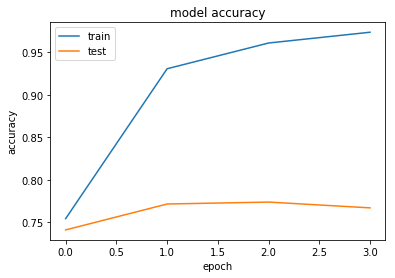

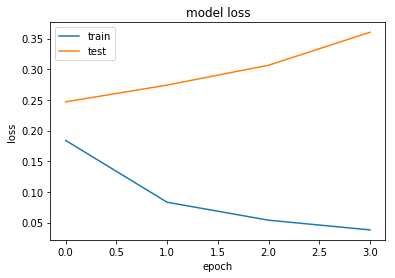

In [59]:
# Visualize training history
# summarize history for accuracy
plt.plot(history.history['top_3_accuracy'])
plt.plot(history.history['val_top_3_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
model.load_weights("./3xBilstm-09-0.35-0.40.hdf5")

ValueError: Operation 'IsVariableInitialized_25' has been marked as not fetchable.

In [239]:
model.evaluate(x=cc_test_data, y=cc_test_data_out, batch_size=None, verbose=1, sample_weight=None, steps=None)

8475/8475 [==============================] - 15s 2ms/step


[0.35682671900695756,
 0.695457227223039,
 0.8662452500267367,
 0.3838348082912355]

In [240]:
pred = model.predict(cc_val_data)
error = cc_val_data_out - pred
error = np.absolute(error)
error_col_sums = [error[cat].sum() for cat in cc_types]
for cat,err in zip(cc_types,error_col_sums):
    print(cat,err/len(error))

is_anagram 0.27134508811291974
is_homophone 0.03939075873617451
is_double 0.12846538594596674
is_cryptic 0.07140522638860179
is_contain 0.3844037081804604
is_reverse 0.10374778863039356
is_alternate 0.015119418038496854
is_init 0.1409753661600937
is_delete 0.3709257346433262
is_charade 0.423911651140193
is_&lit 0.02586975332928806
is_hidden 0.07024161006097804
is_spoonerism 0.0011445446166587546
is_palindrome 0.0011181712882566018


In [76]:
inpt = pad_sequences(tokenizer.texts_to_sequences(['God hurt back']),maxlen=15)

In [79]:
preds = model.predict(inpt)

In [78]:
cc_types

['is_anagram',
 'is_homophone',
 'is_double',
 'is_cryptic',
 'is_contain',
 'is_reverse',
 'is_alternate',
 'is_init',
 'is_delete',
 'is_charade',
 'is_&lit',
 'is_hidden',
 'is_spoonerism',
 'is_palindrome']

In [82]:
for a,b in zip(preds[0],cc_types):
    print(a,b)

0.81713134 is_anagram
8.477837e-07 is_homophone
0.016211942 is_double
0.15162018 is_cryptic
0.1603352 is_contain
0.5928789 is_reverse
0.04534334 is_alternate
0.0005872622 is_init
0.41834003 is_delete
0.2962581 is_charade
0.04753652 is_&lit
0.0013712196 is_hidden
2.8428673e-07 is_spoonerism
0.0067614135 is_palindrome
